In [1]:
import pandas as pd
from rdkit import Chem
import rdkit
from rdkit.Chem.rdMolDescriptors import CalcNumHBA, CalcNumHBD
df = pd.read_csv('prediction_results_distinct_solvents.csv')
df

,DGsolv,comment,can_smiles_solvent,can_smiles_solute,predicted
0,0,for_solvent_tsne,C/C=C/CCCCCCCCCCCC,O,-0.603355
1,0,for_solvent_tsne,C#C,O,-1.839538
2,0,for_solvent_tsne,CCCC(C)CC=O,O,-3.400023
3,0,for_solvent_tsne,CCSSC,O,-1.660721
4,0,for_solvent_tsne,C=C(C)/C=C/C,O,-1.965562
...,...,...,...,...,...
1442,0,for_solvent_tsne,COO,O,-5.887123
1443,0,for_solvent_tsne,FCC(F)F,O,-2.408145
1444,0,for_solvent_tsne,NCCOCCO,O,-6.141492
1445,0,for_solvent_tsne,CC/C=C/C/C=C/C/C=C/CCCCCCCC(=O)O,O,-2.877899


In [2]:
def FG(smiles):
    mol = Chem.MolFromSmiles(smiles)
    
    if smiles == 'O':
        return 'water'


    elif ('O' in smiles) or ('o' in smiles) or ('N' in smiles) or ('n' in smiles): 
        '''
        FG_names = ['Acyclic_Ester', 'Cyclic_Ester', 
                    'Acyclic_Ether', 'Cyclic_Ether',
                    'COOH', '0ry_Alcohol', '1ry_Alcohol', '2ry_Alcohol', '3ry_Alcohol', 
                    'Carbonyl1', 'Carbonyl2', 'peroxide', 'phenolics']

        SMARTS_list = ['[CX3;!R](=[OX1])O[C,c]', '[CX3;R](=[OX1])[O;R][C,c]',
                       '[OD2;!R]([#6])[#6]', '[OD2;R]([#6;R])[#6;R]',
                       '*-C(=O)[O;D1]', '[CH3]-[O;D1]', '[CH2]-[O;D1]', '[CH1]-[O;D1]', '[CH0]-[O;D1]',
                        '*-C(=O)-[C;D1]', '*=[O;D1]', '[O]-[O]', '[c;R]-[O;D1]'
                      ]
        FG_SMARTS = [ rdkit.Chem.MolFromSmarts(x) for x in SMARTS_list  ]


        FG_count = [len(mol.GetSubstructMatches(x)) for x in FG_SMARTS]

        if sum(FG_count) == 0:
            if smiles == 'O' or smiles == '[C-]#[O+]':
                return 'water or carbon monoxide'
            else:
                return 'Furanics'
        else:
            FG_names_lumped = ['Acyclic_Ester', 'Cyclic_Ester', 
                                'Acyclic_Ether', 'Cyclic_Ether', 'COOH',
                                'Alcohol', 'Carbonyls', 'peroxide', 'phenolic']
            FG_count = FG_count[0:5] + [sum(FG_count[5:9])] + [sum(FG_count[9:11])] + FG_count[11:]
            FG_index = next((i for i, x in enumerate(FG_count) if x), None)

            return FG_names_lumped[FG_index]
        '''
        return 'O,N-containing'
    elif ('S' in smiles) or ('s' in smiles):
        return 'S-containing'
    
    elif ('F' in smiles) or ('Cl' in smiles) or ('Br' in smiles) or ('I' in smiles):
        return 'X-containing'

    elif set([ atom.GetSymbol() for atom in mol.GetAtoms()]) == set(['C']):
        FG_names = [  'Alkyne', 'Alkene', 'FusedRing-Aromatics', 'FusedRing-Cycloalkanes'  ]
        SMARTS_list = [ '[C]#[C]', '[C]=[C]', '[cR2]', '[CR2]'  ]

        FG_SMARTS = [ Chem.MolFromSmarts(x) for x in SMARTS_list  ]
        FG_count = [len(mol.GetSubstructMatches(x)) for x in FG_SMARTS]

        FG_index = next((i for i, x in enumerate(FG_count) if x), None)

        if '1' in smiles:
            if 'c' in smiles:
                return 'Aromatics'
            else:
                return 'Cycloalkanes'
        else:
            return 'Hydrocarbons'
 
    elif ('P' in smiles) or ('p' in smiles):
        return 'P-containing'
        '''
        if sum(FG_count) != 0:
            if FG_names[FG_index] == 'FusedRing-Aromatics':
                return 'Aromatics'
            elif FG_names[FG_index] == 'FusedRing-Cycloalkanes':
                return 'Cycloalkanes'
            #else:
            #    print(smiles)
            #    return 'Hydrocarbons'
            #    return FG_names[FG_index]
        else:
            if '1' in smiles:
                if 'c' in smiles:
                    return 'Aromatics'
                else:
                    return 'Cycloalkanes'
            else:
                print(smiles)
                return 'Hydrocarbons'
                #return 'Alkane'
        '''
    else:
        #print(smiles)
        return 'haha'
    
    # my definition

    '''
    if ('O' in smiles) or ('o' in smiles):
        FG_names = ['Acyclic_Ester', 'Cyclic_Ester', 
                    'Acyclic_Ether', 'Cyclic_Ether',
                    'COOH', '0ry_Alcohol', '1ry_Alcohol', '2ry_Alcohol', '3ry_Alcohol', 
                    'Carbonyl1', 'Carbonyl2', 'peroxide', 'phenolics']

        SMARTS_list = ['[CX3;!R](=[OX1])O[C,c]', '[CX3;R](=[OX1])[O;R][C,c]',
                       '[OD2;!R]([#6])[#6]', '[OD2;R]([#6;R])[#6;R]',
                       '*-C(=O)[O;D1]', '[CH3]-[O;D1]', '[CH2]-[O;D1]', '[CH1]-[O;D1]', '[CH0]-[O;D1]',
                        '*-C(=O)-[C;D1]', '*=[O;D1]', '[O]-[O]', '[c;R]-[O;D1]'
                      ]
        FG_SMARTS = [ rdkit.Chem.MolFromSmarts(x) for x in SMARTS_list  ]


        FG_count = [len(mol.GetSubstructMatches(x)) for x in FG_SMARTS]

        if sum(FG_count) == 0:
            if smiles == 'O' or smiles == '[C-]#[O+]':
                return 'water or carbon monoxide'
            else:
                return 'Furanics'
        else:
            FG_names_lumped = ['Acyclic_Ester', 'Cyclic_Ester', 
                                'Acyclic_Ether', 'Cyclic_Ether', 'COOH',
                                'Alcohol', 'Carbonyls', 'peroxide', 'phenolic']
            FG_count = FG_count[0:5] + [sum(FG_count[5:9])] + [sum(FG_count[9:11])] + FG_count[11:]
            FG_index = next((i for i, x in enumerate(FG_count) if x), None)

            return FG_names_lumped[FG_index]
    else:
        #print(smiles)
        return 'haha'
    '''



In [3]:
FGs=[]
for smi in df['can_smiles_solvent']:
    FGs.append(FG(smi))
    
distinct_FGs = set(FGs)
len(FGs), len(df)

(1447, 1447)

In [4]:
len(distinct_FGs)

8

In [5]:
import pickle
with open('feat_vectors_for_shap.pkl', 'rb') as f:
    glob_feat, atom_feat, concat_vec = pickle.load(f)
    gf_solute, gf_solvent = glob_feat
    af_solute, af_solvent = atom_feat
    concat_vec_solute, concat_vec_solvent = concat_vec

In [6]:
concat_vec_solvent.shape

(1447, 128)

In [7]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

pipe = Pipeline(steps=(
    ('PCA', PCA(n_components=10)),
    ('TSNE', TSNE(n_components=2, random_state = 0))
))

'''
pipe = Pipeline(steps=(
    ('PCA', PCA(n_components=2)),  
))
'''

"\npipe = Pipeline(steps=(\n    ('PCA', PCA(n_components=2)),  \n))\n"

In [8]:
t_vec = pipe.fit_transform(concat_vec_solvent)

In [9]:
t_vec

array([[-22.172848 , -32.92614  ],
       [ 23.077301 , -18.808115 ],
       [  5.0631285,   7.1759334],
       ...,
       [  5.7732635,  54.033886 ],
       [-22.074709 ,   9.28102  ],
       [  2.1998932, -40.59107  ]], dtype=float32)

In [10]:
x = t_vec[:,0]
y = t_vec[:,1]
x,y

(array([-22.172848 ,  23.077301 ,   5.0631285, ...,   5.7732635,
        -22.074709 ,   2.1998932], dtype=float32),
 array([-32.92614  , -18.808115 ,   7.1759334, ...,  54.033886 ,
          9.28102  , -40.59107  ], dtype=float32))

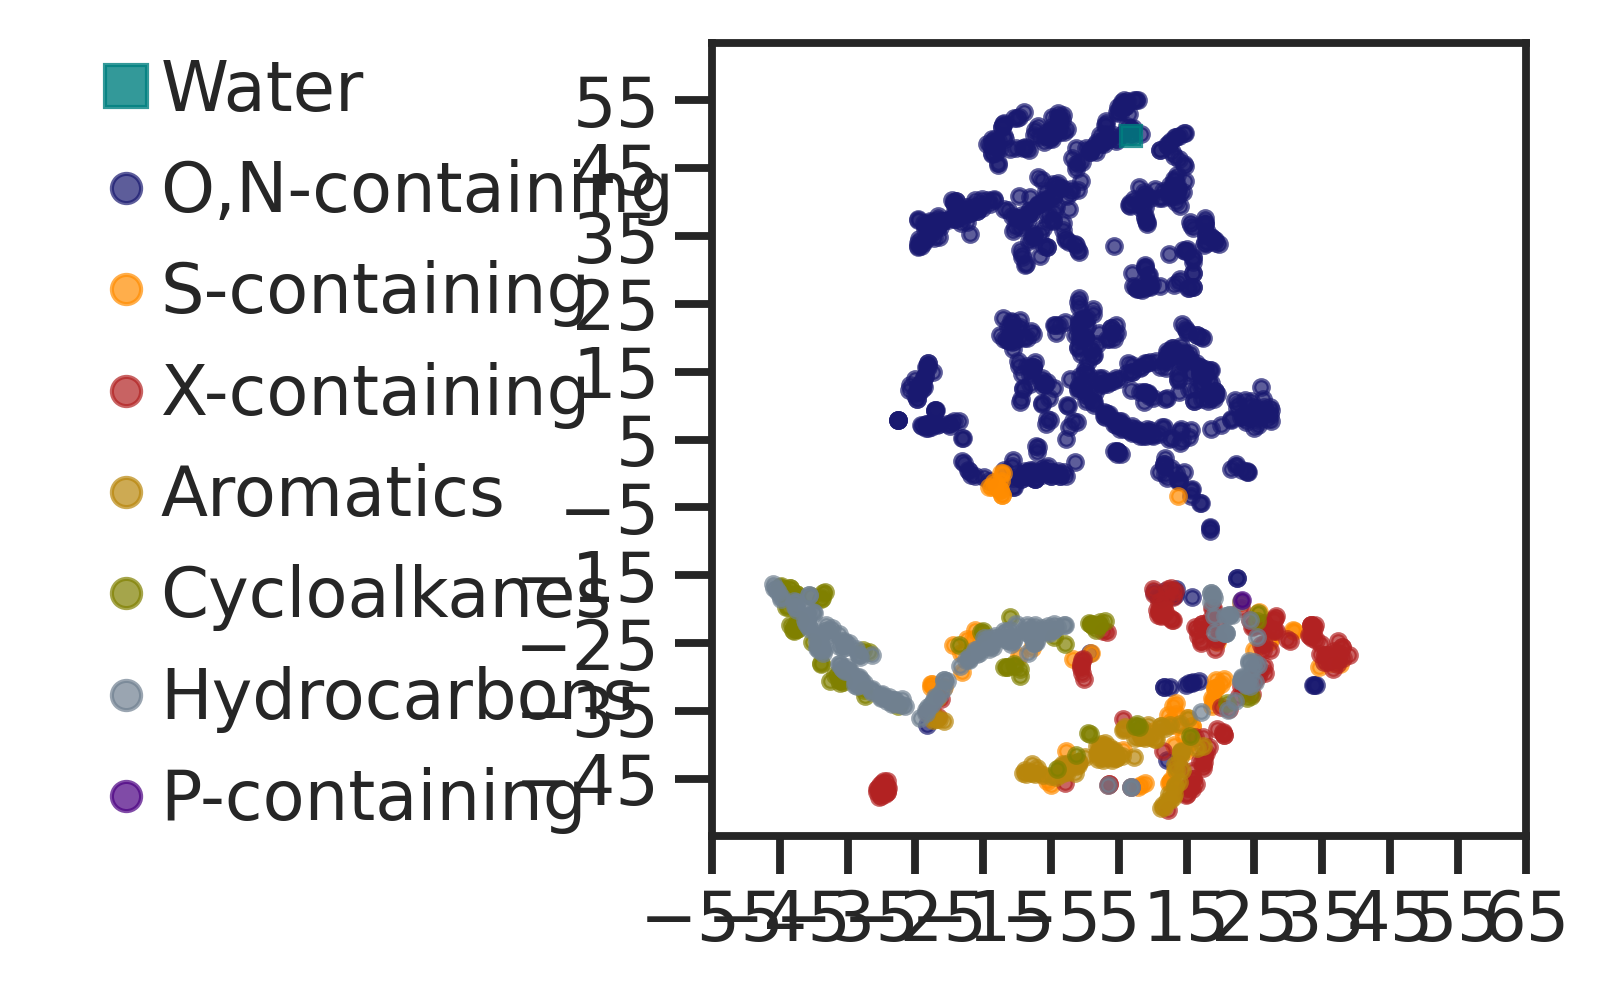

In [11]:
import pandas as pd
import rdkit
import numpy as np
from rdkit.Chem import Draw
from rdkit.Chem.Draw import DrawingOptions
DrawingOptions.atomLabelFontSize = 55
DrawingOptions.dotsPerAngstrom = 100
DrawingOptions.bondLineWidth = 3.0

import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})
%matplotlib inline

matplotlib.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize=(3.5,3.5))
ax = fig.add_subplot(111)
ax.axis('equal')
#ax.set_xticks([])
#ax.set_yticks([])
ax.set_xticks(np.arange(-55.0,65.01,10.0))
ax.set_yticks(np.arange(-55.0,65.01,10.0))
ax.set_xlim([-55,65])
ax.set_ylim([-55,65])
#ax.set_xlabel('Predicted Solubility (kcal/mol)')
#ax.set_ylabel('Solubility in DBs (kcal/mol)')

colors = ['teal', 'midnightblue', 'darkorange',
          'firebrick', 'darkgoldenrod', 'olive', 'slategray', 'indigo'
         ]

#for fg in distinct_FGs:
for j, fg in enumerate(['water', 'O,N-containing', 
           'S-containing', 'X-containing','Aromatics',
           'Cycloalkanes','Hydrocarbons', 'P-containing']):

    indices_to_plot = [ i for i, x in enumerate(FGs) if x == fg]
    #indices_to_plot = [1417]
    x_sub = [x[i] for i in indices_to_plot]
    y_sub = [y[i] for i in indices_to_plot]

    if fg == 'water':
        ax.plot(x_sub, y_sub, 's', ms=5, alpha=0.8, label = 'Water', zorder=100, color = colors[j])
    else:
        ax.plot(x_sub, y_sub, '.', ms=7, alpha=0.7, label = fg, color = colors[j])
        
lgnd = ax.legend(loc='best', bbox_to_anchor=(0.03, 1.06), handletextpad=-0.5, markerscale = 2)
    
#ax.plot([-35,10], [-35, 10], '--', color='.1')

In [12]:
pipe[0].explained_variance_ratio_

array([0.29378554, 0.15237743, 0.09755137, 0.06267554, 0.04384086,
       0.04150949, 0.03345194, 0.02803987, 0.0215514 , 0.01651707],
      dtype=float32)

In [13]:
sum(pipe[0].explained_variance_ratio_)

0.7913005258888006

In [31]:
list(df['can_smiles_solvent']).index(Chem.MolToSmiles(Chem.MolFromSmiles('CCOCC')))

1126

In [15]:
x[1417],y[1417]

(-18.057398, 5.1959486)

In [16]:
x.min(), x.max(), y.min(), y.max()

(-46.05421, 38.94791, -49.580338, 55.133293)

In [17]:
df['FG'] = FGs

In [18]:
df['x'] = x
df['y'] = y

In [30]:
#df[(df.FG == 'O,N-containing') & (df.x < 35) & (df.x > 25) & (df.y > -35) & (df.y < -25)]
#df[(df.FG == 'O,N-containing') & (df.x < 15) & (df.y < -35)]
df[(df.FG == 'O,N-containing') & (df.x < -5) & (df.x > -15) & (df.y > -5) & (df.y < 5)]

,DGsolv,comment,can_smiles_solvent,can_smiles_solute,predicted,FG,x,y
30,0,for_solvent_tsne,CCC(C)OC(C)(C)C,O,-3.220126,"O,N-containing",-8.767060,0.291539
159,0,for_solvent_tsne,C=COCCCC,O,-2.940364,"O,N-containing",-6.402567,-0.216850
186,0,for_solvent_tsne,CCCN(CCC)CCC,O,-2.193302,"O,N-containing",-14.105599,-1.066280
306,0,for_solvent_tsne,CCCCOC(C)C,O,-3.025088,"O,N-containing",-8.277924,-0.496568
309,0,for_solvent_tsne,CC(C)COC(C)C,O,-3.278362,"O,N-containing",-7.756894,0.210179
348,0,for_solvent_tsne,Cc1cccc(OC(C)C)c1,O,-2.406652,"O,N-containing",-10.788469,1.145849
586,0,for_solvent_tsne,CCOC(C)(C)C,O,-3.648199,"O,N-containing",-5.910726,0.392614
603,0,for_solvent_tsne,CC(C)COC(C)(C)C,O,-3.215900,"O,N-containing",-8.585445,0.249215
664,0,for_solvent_tsne,CCC(C)OC(C)CC,O,-2.918863,"O,N-containing",-9.354424,-0.150191
704,0,for_solvent_tsne,CCCCCOC,O,-3.013053,"O,N-containing",-7.338983,-0.796263


In [32]:
df.iloc[1126]

DGsolv                               0
comment               for_solvent_tsne
can_smiles_solvent               CCOCC
can_smiles_solute                    O
predicted                    -3.865521
FG                      O,N-containing
x                            -3.657776
y                            -0.333176
Name: 1126, dtype: object